# Library

In [70]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
import os
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import plotly.offline as py
from imblearn.over_sampling import SMOTE
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pickle
from sklearn.impute import SimpleImputer
import gc
import lightgbm as lgb
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_list = ["application_test.csv", "application_train.csv", "previous_application.csv", "bureau.csv", "bureau_balance.csv", "credit_card_balance.csv", "POS_CASH_balance.csv", "installments_payments.csv", "sample_submission.csv"]
csv_list

['application_test.csv',
 'application_train.csv',
 'previous_application.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'POS_CASH_balance.csv',
 'installments_payments.csv',
 'sample_submission.csv']

In [4]:
for i in csv_list :
  string = i.replace(".csv", "").lower()
  exec("df_{} = pd.read_csv('drive/MyDrive/Portofolio/Home_Credit/{}')".format(string, i))
  print("Data Frame {}".format(i))
  eval("display(df_{}.head())".format(string))

Data Frame application_test.csv


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Data Frame application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Data Frame previous_application.csv


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Data Frame bureau.csv


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Data Frame bureau_balance.csv


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Data Frame credit_card_balance.csv


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Data Frame POS_CASH_balance.csv


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Data Frame installments_payments.csv


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Data Frame sample_submission.csv


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


# Missing Value Ratio

In [5]:
for i in csv_list :
  string = i.replace(".csv", "").lower()
  exec("all_data_na = (df_{}.isnull().sum() / len(df_{})) * 100".format(string, string))
  all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
  missing_data_application_train = pd.DataFrame({'Missing Ratio' :all_data_na})
  eval("print('Missing Value Ration {}'.format(string))")
  eval("display(missing_data_application_train.head(20))")
  print("\n")

Missing Value Ration application_test


,Missing Ratio
COMMONAREA_MODE,68.716150
COMMONAREA_MEDI,68.716150
COMMONAREA_AVG,68.716150
NONLIVINGAPARTMENTS_MEDI,68.412523
NONLIVINGAPARTMENTS_AVG,68.412523
NONLIVINGAPARTMENTS_MODE,68.412523
FONDKAPREMONT_MODE,67.284179
LIVINGAPARTMENTS_MODE,67.249302
LIVINGAPARTMENTS_MEDI,67.249302
LIVINGAPARTMENTS_AVG,67.249302




Missing Value Ration application_train


,Missing Ratio
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_AVG,68.354953




Missing Value Ration previous_application


,Missing Ratio
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
NAME_TYPE_SUITE,49.119754
DAYS_FIRST_DRAWING,40.298129
DAYS_FIRST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_LAST_DUE,40.298129
DAYS_TERMINATION,40.298129




Missing Value Ration bureau


,Missing Ratio
AMT_ANNUITY,71.473490
AMT_CREDIT_MAX_OVERDUE,65.513264
DAYS_ENDDATE_FACT,36.916958
AMT_CREDIT_SUM_LIMIT,34.477415
AMT_CREDIT_SUM_DEBT,15.011932
DAYS_CREDIT_ENDDATE,6.149573
AMT_CREDIT_SUM,0.000757




Missing Value Ration bureau_balance


,Missing Ratio




Missing Value Ration credit_card_balance


,Missing Ratio
AMT_PAYMENT_CURRENT,19.998063
AMT_DRAWINGS_ATM_CURRENT,19.524872
AMT_DRAWINGS_OTHER_CURRENT,19.524872
AMT_DRAWINGS_POS_CURRENT,19.524872
CNT_DRAWINGS_ATM_CURRENT,19.524872
CNT_DRAWINGS_OTHER_CURRENT,19.524872
CNT_DRAWINGS_POS_CURRENT,19.524872
AMT_INST_MIN_REGULARITY,7.948208
CNT_INSTALMENT_MATURE_CUM,7.948208




Missing Value Ration pos_cash_balance


,Missing Ratio
CNT_INSTALMENT_FUTURE,0.260835
CNT_INSTALMENT,0.260675




Missing Value Ration installments_payments


,Missing Ratio
DAYS_ENTRY_PAYMENT,0.021352
AMT_PAYMENT,0.021352




Missing Value Ration sample_submission


,Missing Ratio


dari sini kita bisa melihat bahwa missing value tidak terdapat di csv **bureau_balance**, dan **sample_submission**

# Join Bureau

In [6]:
bureau = df_bureau
application = df_application_train

grp = bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]

bureau_categorical = pd.get_dummies(bureau.select_dtypes('object'))
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
grp_category = bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()
grp_category.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp_category.columns]

# Combining
application_bureau = application.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))
application_bureau = application_bureau.merge(grp_category, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp_category.columns].fillna(0))

# Display
display(df_application_train)
display(application_bureau)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,BUREAU_CREDIT_TYPE_Interbank credit,BUREAU_CREDIT_TYPE_Loan for business development,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending),BUREAU_CREDIT_TYPE_Loan for the purchase of equipment,BUREAU_CREDIT_TYPE_Loan for working capital replenishment,BUREAU_CREDIT_TYPE_Microloan,BUREAU_CREDIT_TYPE_Mobile operator loan,BUREAU_CREDIT_TYPE_Mortgage,BUREAU_CREDIT_TYPE_Real estate loan,BUREAU_CREDIT_TYPE_Unknown type of loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering

In [7]:
# Combining numerical features
grp = bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))
# Combining categorical features
bureau_categorical = pd.get_dummies(bureau.select_dtypes('object'))
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
grp = bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))
# Shape of application and bureau data combined
print('The shape application and bureau data combined:',application_bureau.shape)

The shape application and bureau data combined: (307511, 157)


In [8]:
# Number of past loans per customer
grp = bureau.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count().reset_index().rename(columns = {'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau['BUREAU_LOAN_COUNT'] = application_bureau['BUREAU_LOAN_COUNT'].fillna(0)

In [9]:
# Number of types of past loans per customer 
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau['BUREAU_LOAN_TYPES'] = application_bureau['BUREAU_LOAN_TYPES'].fillna(0)

In [10]:
# Debt over credit ratio 
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM': 'TOTAL_CREDIT_SUM'})
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CREDIT_SUM_DEBT'})
grp1['DEBT_CREDIT_RATIO'] = grp2['TOTAL_CREDIT_SUM_DEBT']/grp1['TOTAL_CREDIT_SUM']
del grp1['TOTAL_CREDIT_SUM']
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0)
application_bureau['DEBT_CREDIT_RATIO'] = pd.to_numeric(application_bureau['DEBT_CREDIT_RATIO'], downcast='float')

In [11]:
# Overdue over debt ratio
bureau['AMT_CREDIT_SUM_OVERDUE'] = bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CUSTOMER_DEBT'})
grp1['OVERDUE_DEBT_RATIO'] = grp1['TOTAL_CUSTOMER_OVERDUE']/grp2['TOTAL_CUSTOMER_DEBT']
del grp1['TOTAL_CUSTOMER_OVERDUE']
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].replace([np.inf, -np.inf], 0)
application_bureau['OVERDUE_DEBT_RATIO'] = pd.to_numeric(application_bureau['OVERDUE_DEBT_RATIO'], downcast='float')

# Join Application_Previous

In [12]:
# Number of previous applications per customer
previous_applicaton = df_previous_application
grp = previous_applicaton[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
application_bureau_prev = application_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev['PREV_APP_COUNT'] = application_bureau_prev['PREV_APP_COUNT'].fillna(0)
# Combining numerical features
grp = previous_applicaton.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
# Combining categorical features
prev_categorical = pd.get_dummies(previous_applicaton.select_dtypes('object'))
prev_categorical['SK_ID_CURR'] = previous_applicaton['SK_ID_CURR']
prev_categorical.head()
grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Join Pos_Cash

In [13]:
# Combining numerical features
pos_cash = df_pos_cash_balance
grp = pos_cash.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
# Combining categorical features
pos_cash_categorical = pd.get_dummies(pos_cash.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = pos_cash['SK_ID_CURR']
grp = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Join Install Payments

In [14]:
# Combining numerical features and there are no categorical features in this dataset
insta_payments = df_installments_payments
grp = insta_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Join Credit_Card Balance

In [15]:
# Combining numerical features
credit_card = df_credit_card_balance
grp = credit_card.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))
# Combining categorical features
credit_categorical = pd.get_dummies(credit_card.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = credit_card['SK_ID_CURR']
grp = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Exploratory Data Analytics

## Dataset Information

In [16]:
application_bureau.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 161 columns):
 #    Column                                                           Dtype  
---   ------                                                           -----  
 0    SK_ID_CURR                                                       int64  
 1    TARGET                                                           int64  
 2    NAME_CONTRACT_TYPE                                               object 
 3    CODE_GENDER                                                      object 
 4    FLAG_OWN_CAR                                                     object 
 5    FLAG_OWN_REALTY                                                  object 
 6    CNT_CHILDREN                                                     int64  
 7    AMT_INCOME_TOTAL                                                 float64
 8    AMT_CREDIT                                                       float64
 9    AMT_ANNUITY  

In [17]:
application_bureau_prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 371 columns):
 #    Column                                                            Dtype  
---   ------                                                            -----  
 0    SK_ID_CURR                                                        int64  
 1    TARGET                                                            int64  
 2    NAME_CONTRACT_TYPE                                                object 
 3    CODE_GENDER                                                       object 
 4    FLAG_OWN_CAR                                                      object 
 5    FLAG_OWN_REALTY                                                   object 
 6    CNT_CHILDREN                                                      int64  
 7    AMT_INCOME_TOTAL                                                  float64
 8    AMT_CREDIT                                                        float64
 9    AM

## Payment Dificulties

In [18]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
  if int(label) == 0:
    return "No Payment Difficulties"
  elif int(label) == 1:
    return "Payment Difficulties"

application_bureau['TARGET'] = application_bureau['TARGET'].apply(lambda x: decode_sentiment(x))
application_bureau_prev['TARGET'] = application_bureau_prev['TARGET'].apply(lambda x: decode_sentiment(x))

In [19]:
target_grp = (application_bureau[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


In [20]:
target_grp = (application_bureau_prev[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,No Payment Difficulties,282686
1,Payment Difficulties,24825


In [21]:
application_bureau['TARGET'].value_counts(normalize=True)

No Payment Difficulties    0.919271
Payment Difficulties       0.080729
Name: TARGET, dtype: float64

In [22]:
application_bureau_prev['TARGET'].value_counts(normalize=True)

No Payment Difficulties    0.919271
Payment Difficulties       0.080729
Name: TARGET, dtype: float64

Tedapat 91 % tanpa kesulitan pembayaran dan 8 % yang mengalami kesulitan pembayaran

## Bivariate Analysis

### Kategori

In [23]:
column = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"]

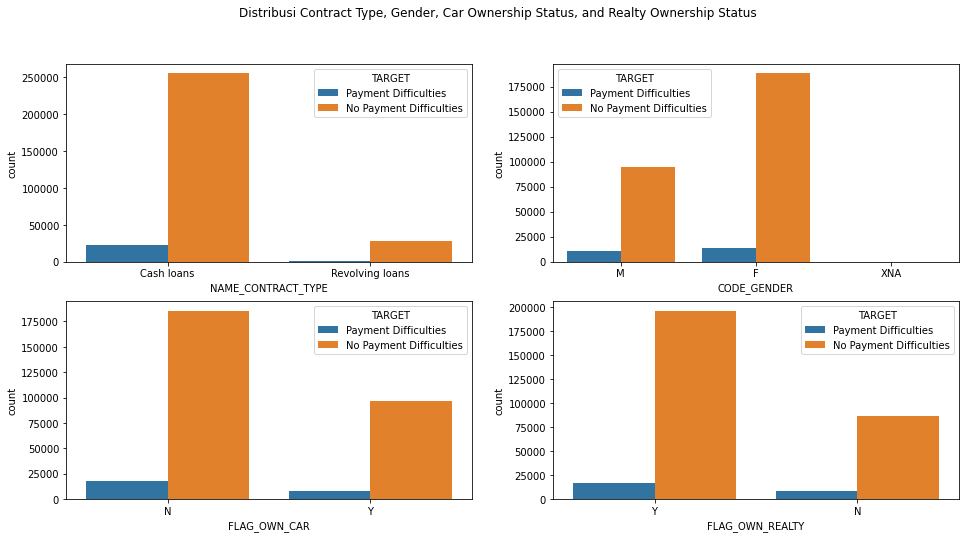

In [24]:
plt.figure(figsize=(16,8))
idx = 1
for i in column:
    plt.subplot(2,2,idx)
    sns.countplot(application_bureau[i], hue=application_bureau.TARGET)
    idx += 1
    plt.suptitle("Distribusi Contract Type, Gender, Car Ownership Status, and Realty Ownership Status")
plt.show()

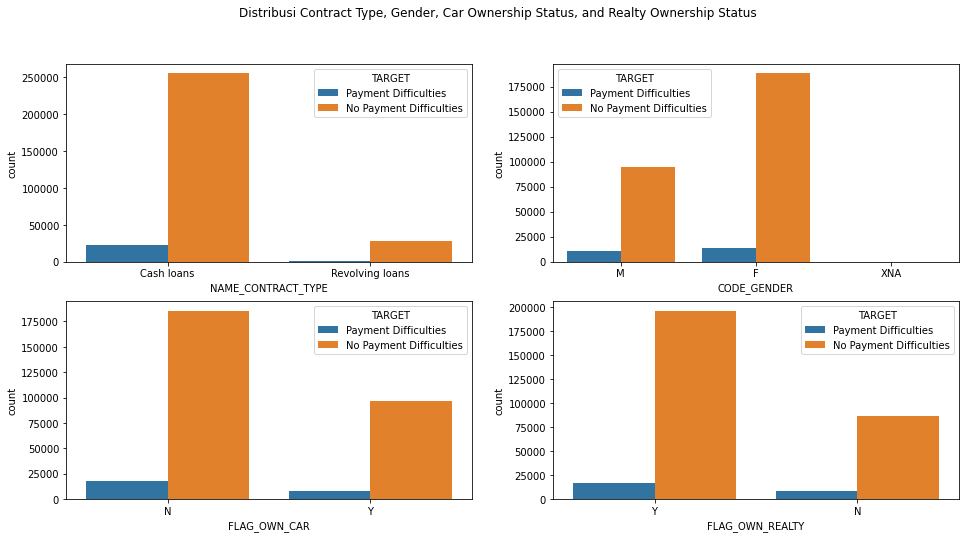

In [25]:
plt.figure(figsize=(16,8))
idx = 1
for i in column:
    plt.subplot(2,2,idx)
    sns.countplot(application_bureau_prev[i], hue=application_bureau.TARGET)
    idx += 1
    plt.suptitle("Distribusi Contract Type, Gender, Car Ownership Status, and Realty Ownership Status")
plt.show()



*   Klien memiliki mobil lebih banyak dibandingkan dengan tidak pada kasus sulit pembayaran
*   Gender yang sering meminjam itu berada di perempuan (female)
*   Type contract paling banyak yaitu berada di cash loans
*   Flag Own Realty paling banyak yang memiliki di bagian sulit pembayaran





In [26]:
ct = application_bureau.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
display(ct.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

application_bureau['CODE_GENDER'] = application_bureau['CODE_GENDER'].replace(['F','M'],['Female','Male'])
gt = application_bureau.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
display(gt.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

application_bureau['FLAG_OWN_CAR'] = application_bureau['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])
ot = application_bureau.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
display(ot.sort_values(by='SK_ID_CURR', ascending=False))

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
2,Revolving loans,No Payment Difficulties,27675
1,Cash loans,Payment Difficulties,23221
3,Revolving loans,Payment Difficulties,1604




Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,188278
2,Male,No Payment Difficulties,94404
1,Female,Payment Difficulties,14170
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4




Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,185675
2,Yes,No Payment Difficulties,97011
1,No,Payment Difficulties,17249
3,Yes,Payment Difficulties,7576


In [27]:
column = ["NAME_TYPE_SUITE", "NAME_TYPE_SUITE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS"]

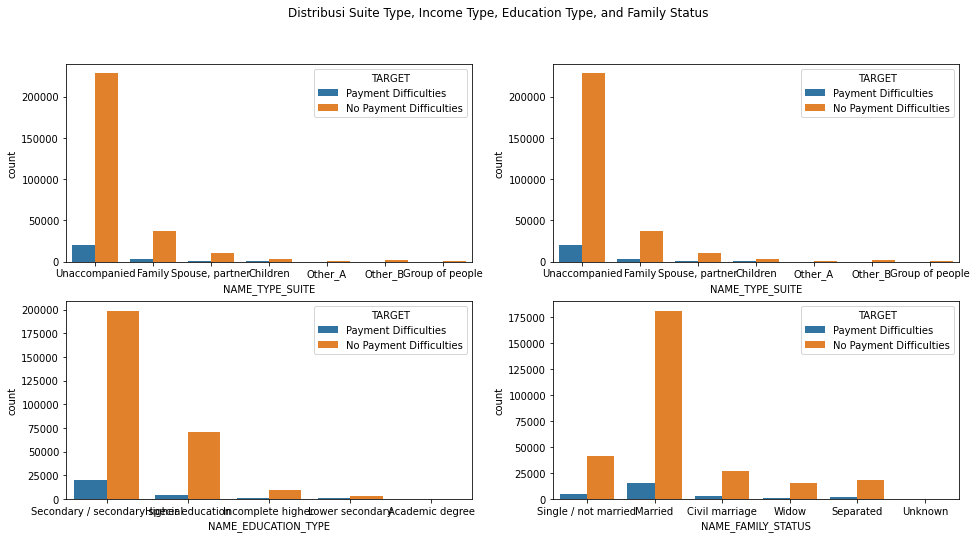

In [28]:
plt.figure(figsize=(16,8))
idx = 1
for i in column:
    plt.subplot(2,2,idx)
    sns.countplot(application_bureau[i], hue=application_bureau.TARGET)
    idx += 1
    plt.suptitle("Distribusi Suite Type, Income Type, Education Type, and Family Status")
plt.show()

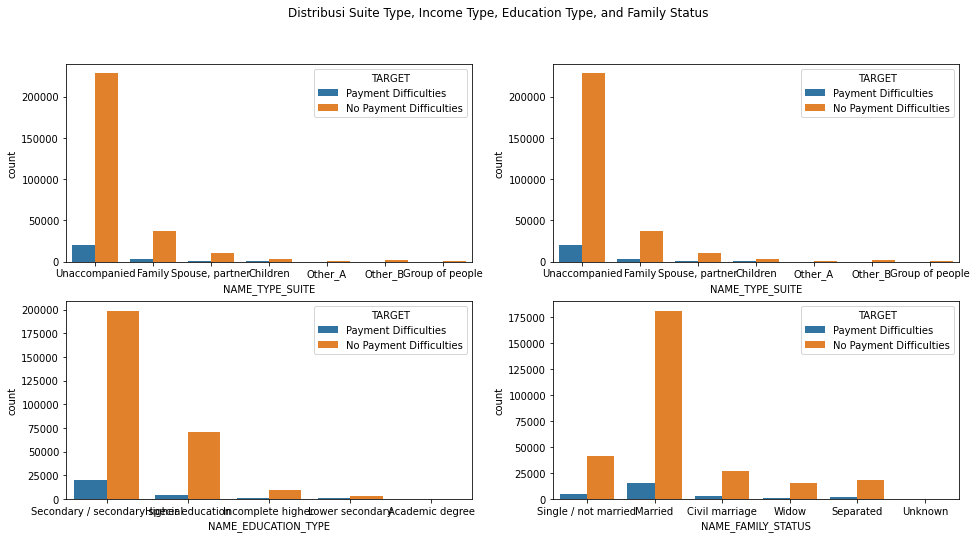

In [29]:
plt.figure(figsize=(16,8))
idx = 1
for i in column:
    plt.subplot(2,2,idx)
    sns.countplot(application_bureau_prev[i], hue=application_bureau.TARGET)
    idx += 1
    plt.suptitle("Distribusi Suite Type, Income Type, Education Type, and Family Status")
plt.show()


Klien yang disertai dengan other_b saat mengajukan pinjaman memiliki persentase yang lebih tinggi karena mengalami kesulitan membayar kembali pinjaman (sekitar 10%).


Dapat dilihat bahwa klien yang memiliki jenis pendapatan bekerja telah mengajukan sebagian besar pinjaman, ada sekitar 158.774 aplikasi pinjaman.

Klien dengan jenis pendapatan pengusaha dan siswa tidak mengalami kesulitan dalam membayar kembali pinjaman mereka.

Sementara, klien dengan jenis pendapatan cuti hamil dan pengangguran memiliki persentase tertinggi (sekitar 40% dan 36%) dari TARGET = 1, yaitu. mengalami masalah dalam membayar kembali pinjaman.



In [30]:
st = application_bureau.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
display(st.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

rt = application_bureau.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
display(rt.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

et = application_bureau.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
display(et.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

ft = application_bureau.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
display(ft.sort_values(by='SK_ID_CURR', ascending=False))

Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,No Payment Difficulties,228189
2,Family,No Payment Difficulties,37140
13,Unaccompanied,Payment Difficulties,20337
10,"Spouse, partner",No Payment Difficulties,10475
0,Children,No Payment Difficulties,3026
3,Family,Payment Difficulties,3009
8,Other_B,No Payment Difficulties,1596
11,"Spouse, partner",Payment Difficulties,895
6,Other_A,No Payment Difficulties,790
4,Group of people,No Payment Difficulties,248




Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,No Payment Difficulties,143550
1,Commercial associate,No Payment Difficulties,66257
5,Pensioner,No Payment Difficulties,52380
7,State servant,No Payment Difficulties,20454
13,Working,Payment Difficulties,15224
2,Commercial associate,Payment Difficulties,5360
6,Pensioner,Payment Difficulties,2982
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18
10,Unemployed,No Payment Difficulties,14




Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,No Payment Difficulties,198867
2,Higher education,No Payment Difficulties,70854
9,Secondary / secondary special,Payment Difficulties,19524
4,Incomplete higher,No Payment Difficulties,9405
3,Higher education,Payment Difficulties,4009
6,Lower secondary,No Payment Difficulties,3399
5,Incomplete higher,Payment Difficulties,872
7,Lower secondary,Payment Difficulties,417
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3




Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,No Payment Difficulties,181582
6,Single / not married,No Payment Difficulties,40987
0,Civil marriage,No Payment Difficulties,26814
4,Separated,No Payment Difficulties,18150
9,Widow,No Payment Difficulties,15151
3,Married,Payment Difficulties,14850
7,Single / not married,Payment Difficulties,4457
1,Civil marriage,Payment Difficulties,2961
5,Separated,Payment Difficulties,1620
10,Widow,Payment Difficulties,937


In [31]:
column = ["NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START"]

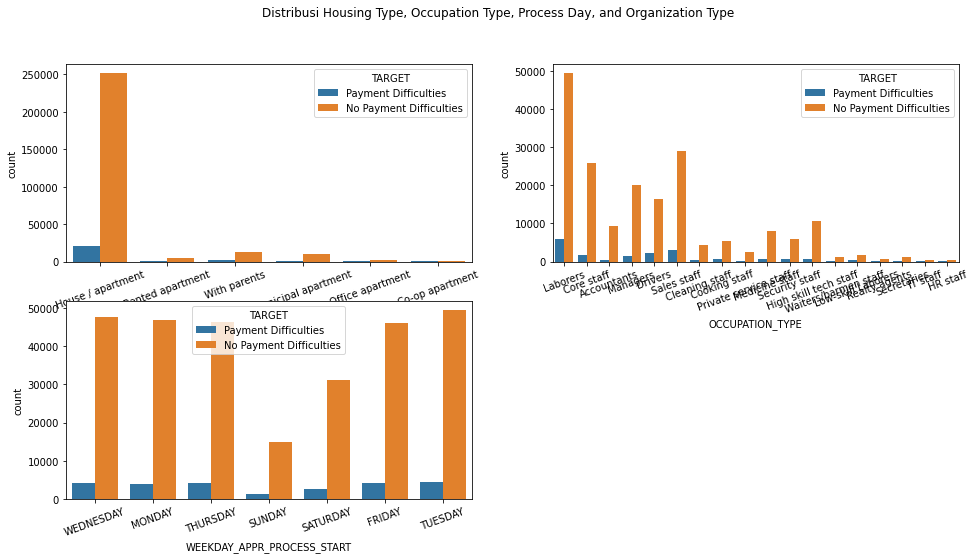

In [32]:
plt.figure(figsize=(16,8))
idx = 1
for i in column:
    plt.subplot(2,2,idx)
    sns.countplot(application_bureau_prev[i], hue=application_bureau.TARGET)
    idx += 1
    plt.suptitle("Distribusi Housing Type, Occupation Type, Process Day, and Organization Type")
    plt.xticks(rotation=20)
plt.show()

*   Terlihat bahwa nasabah dengan tipe rumah kontrakan apartemen memiliki persentase tertinggi dalam kesulitan dalam mengembalikan pinjaman.
*   Klien yang tinggal di Rumah / apartemen memiliki jumlah aplikasi pinjaman tertinggi.
*   Dapat dilihat bahwa klien dengan jenis pekerjaan Pekerja berketerampilan rendah memiliki persentase tertinggi dari TARGET = 1, yaitu. mengalami masalah dalam membayar kembali pinjaman.
*   Dapat dilihat bahwa setiap hari pemrosesan aplikasi memiliki persentase yang hampir sama dari TARGET = 1, yaitu. mengalami masalah dalam pengembalian pinjaman.



In [33]:
ht = application_bureau_prev.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
display(ht.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

ot = application_bureau_prev.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
display(ot.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

pt = application_bureau_prev.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
display(pt.sort_values(by='SK_ID_CURR', ascending=False))
print("\n")

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
10,With parents,No Payment Difficulties,13104
4,Municipal apartment,No Payment Difficulties,10228
8,Rented apartment,No Payment Difficulties,4280
6,Office apartment,No Payment Difficulties,2445
11,With parents,Payment Difficulties,1736
0,Co-op apartment,No Payment Difficulties,1033
5,Municipal apartment,Payment Difficulties,955
9,Rented apartment,Payment Difficulties,601




Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,No Payment Difficulties,49348
28,Sales staff,No Payment Difficulties,29010
6,Core staff,No Payment Difficulties,25832
20,Managers,No Payment Difficulties,20043
8,Drivers,No Payment Difficulties,16496
12,High skill tech staff,No Payment Difficulties,10679
0,Accountants,No Payment Difficulties,9339
22,Medicine staff,No Payment Difficulties,7965
32,Security staff,No Payment Difficulties,5999
17,Laborers,Payment Difficulties,5838




Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
10,TUESDAY,No Payment Difficulties,49400
12,WEDNESDAY,No Payment Difficulties,47696
2,MONDAY,No Payment Difficulties,46780
8,THURSDAY,No Payment Difficulties,46493
0,FRIDAY,No Payment Difficulties,46237
4,SATURDAY,No Payment Difficulties,31182
6,SUNDAY,No Payment Difficulties,14898
11,TUESDAY,Payment Difficulties,4501
13,WEDNESDAY,Payment Difficulties,4238
1,FRIDAY,Payment Difficulties,4101


### Numerik

In [34]:
column = ["AMT_CREDIT", "AMT_INCOME_TOTAL"]

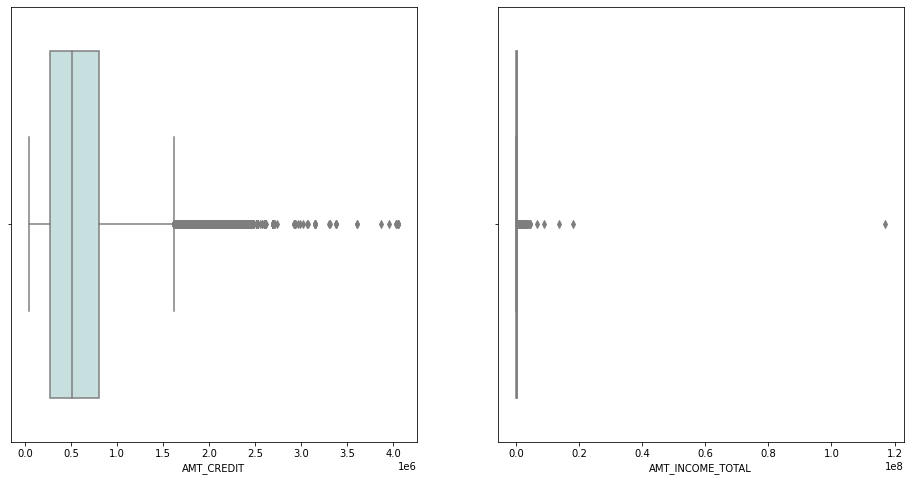

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
idx = 1
for i in column:
    plt.subplot(1,2,idx)
    #plt.title(f"{i}")
    sns.boxplot(application_bureau[i], palette = 'ch:start=0.2,rot=-.3_r')
    #plt.hist(df[i])
    idx += 1
plt.show()

1.   nilai rata-rata jumlah kredit klien yang tidak memiliki kesulitan pembayaran sedikit lebih besar
2.   klien yang mengalami kesulitan pembayaran maupun klien yang tidak memiliki kesulitan pembayaran, sebagian besar memiliki nilai yang sama



In [36]:
application_bureau_prev['TARGET'].value_counts()

No Payment Difficulties    282686
Payment Difficulties        24825
Name: TARGET, dtype: int64

In [37]:
application_bureau_prev['TARGET'] = application_bureau_prev['TARGET'].replace({'No Payment Difficulties' : 1, 'Payment Difficulties' : 0})

In [38]:
no_age = application_bureau_prev[application_bureau_prev['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = application_bureau_prev[application_bureau_prev['TARGET']==1]['DAYS_BIRTH'].values/-365

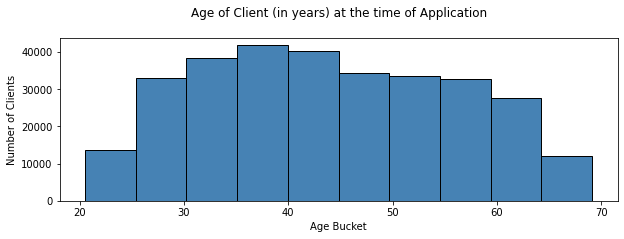

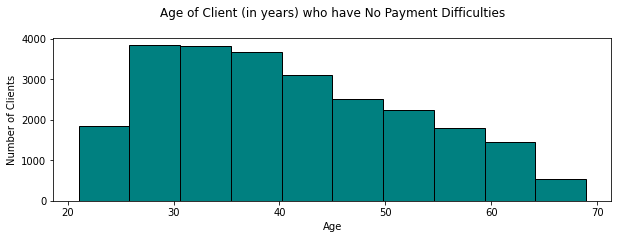

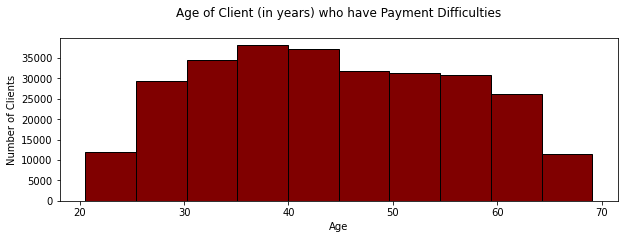

In [39]:
plt.figure(figsize=(10,3))
plt.hist(application_bureau['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar jumlah klien yang mengajukan pinjaman berada di kisaran 35-40 tahun, diikuti oleh klien dalam kisaran 40-45 tahun. Sementara itu, jumlah pelamar untuk klien berusia < 25 tahun atau usia >65 tahun sangat rendah.

Klien yang tidak memiliki kesulitan pembayaran adalah klien kisaran 35-45 tahun. Sedangkan klien yang mengalami kesulitan pembayaran adalah klien kisaran 25-35 tahun.

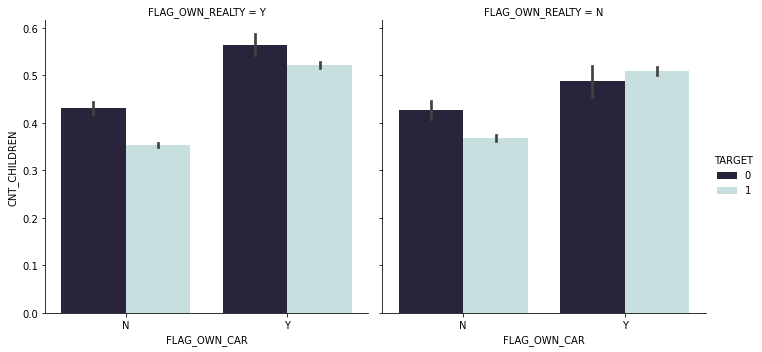

In [40]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = application_bureau_prev)
plt.show()

Klien yang memiliki mobil dan rumah/flat memiliki masalah dalam membayar kembali pinjaman untuk sejumlah besar anak dibandingkan dengan klien yang tidak memiliki rumah/flat

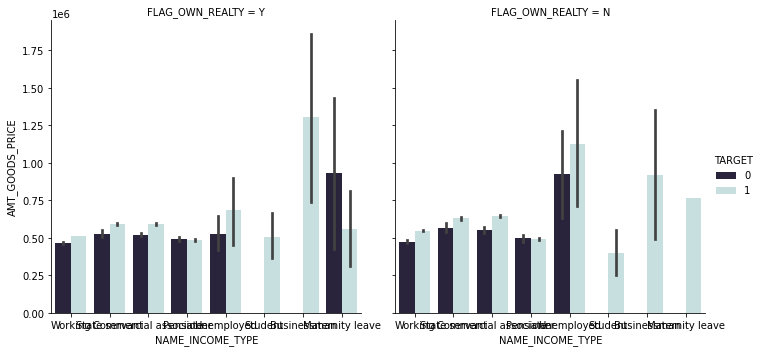

In [41]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = application_bureau_prev)
plt.show()

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien dengan jenis pendapatan cuti hamil di FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/rumah susun) memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan ketika FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/rumah susun).

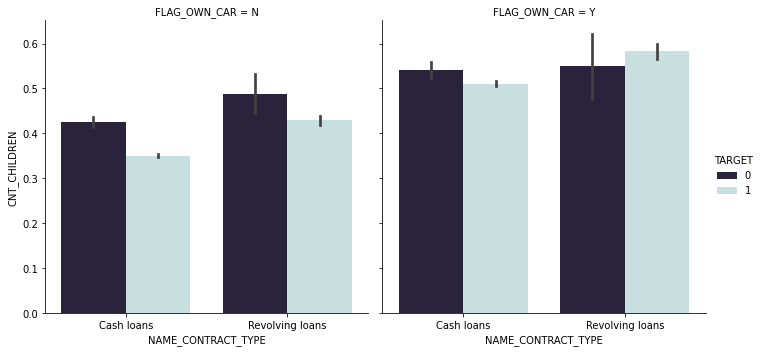

In [42]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = application_bureau_prev)
plt.show()

Untuk pinjaman bergulir dalam FLAG_OWN_CAR = Tidak (yaitu tidak memiliki mobil) memiliki masalah membayar kembali pinjaman dibandingkan dengan ketika FLAG_OWN_CAR = Ya (yaitu memiliki mobil).

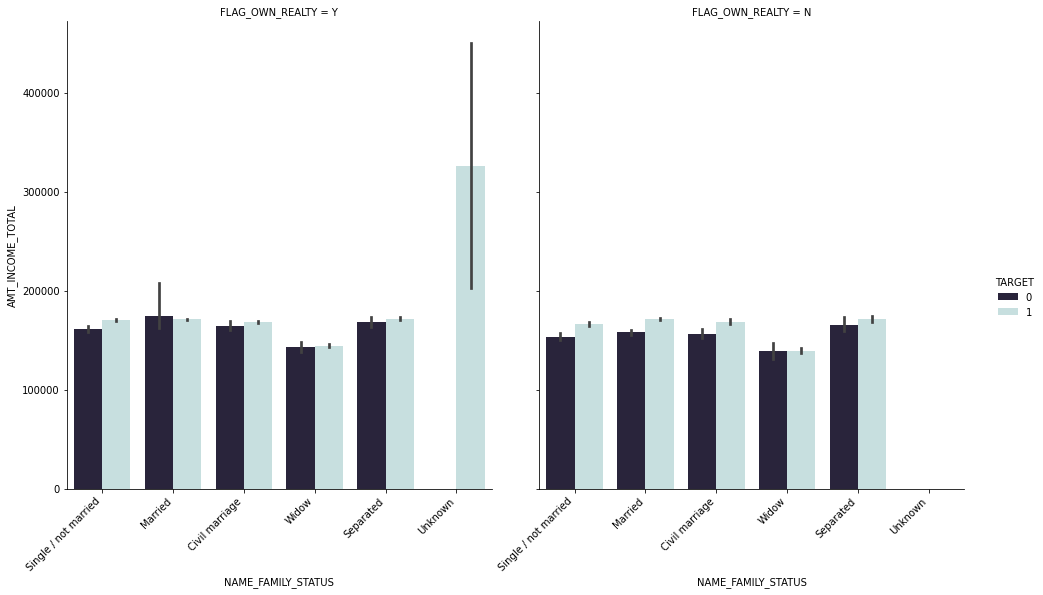

In [43]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = application_bureau_prev)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Klien yang menikah dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) memiliki masalah membayar kembali pinjaman untuk jumlah pendapatan menengah dibandingkan dengan ketika klien tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

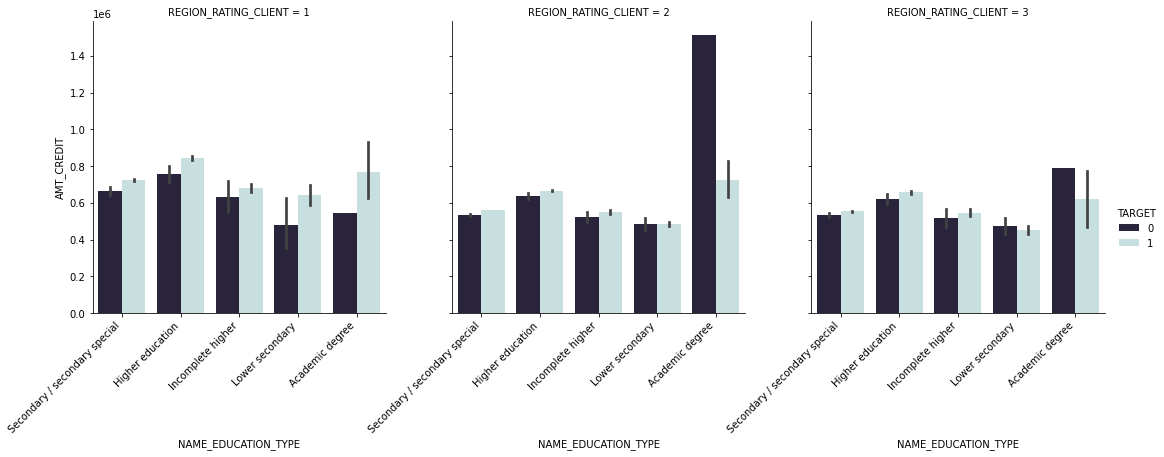

In [44]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = application_bureau_prev)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk klien yang memiliki gelar akademik dan tinggal di wilayah dengan peringkat 2 , memiliki masalah membayar kembali pinjaman untuk jumlah kredit pinjaman yang lebih tinggi. Dan, klien dengan derajat yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah membayar kembali pinjaman untuk kredit jumlah menengah dari pinjaman.

# Preprocessing

## Convert to Numerik (Label Encoder)

In [45]:
le = LabelEncoder()
categoric_data = application_bureau.select_dtypes(include='object').columns.tolist()
for i in categoric_data:
  application_bureau[i] = le.fit_transform(application_bureau[i])
application_bureau.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 161 columns):
 #    Column                                                           Dtype  
---   ------                                                           -----  
 0    SK_ID_CURR                                                       int64  
 1    TARGET                                                           int64  
 2    NAME_CONTRACT_TYPE                                               int64  
 3    CODE_GENDER                                                      int64  
 4    FLAG_OWN_CAR                                                     int64  
 5    FLAG_OWN_REALTY                                                  int64  
 6    CNT_CHILDREN                                                     int64  
 7    AMT_INCOME_TOTAL                                                 float64
 8    AMT_CREDIT                                                       float64
 9    AMT_ANNUITY  

In [46]:
le = LabelEncoder()
categoric_data = application_bureau_prev.select_dtypes(include='object').columns.tolist()
for i in categoric_data:
  application_bureau_prev[i] = le.fit_transform(application_bureau_prev[i])
application_bureau_prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 371 columns):
 #    Column                                                            Dtype  
---   ------                                                            -----  
 0    SK_ID_CURR                                                        int64  
 1    TARGET                                                            int64  
 2    NAME_CONTRACT_TYPE                                                int64  
 3    CODE_GENDER                                                       int64  
 4    FLAG_OWN_CAR                                                      int64  
 5    FLAG_OWN_REALTY                                                   int64  
 6    CNT_CHILDREN                                                      int64  
 7    AMT_INCOME_TOTAL                                                  float64
 8    AMT_CREDIT                                                        float64
 9    AM

## Fill Missing Value with mean


In [47]:
print(application_bureau.isnull().sum().to_string())

SK_ID_CURR                                                              0
TARGET                                                                  0
NAME_CONTRACT_TYPE                                                      0
CODE_GENDER                                                             0
FLAG_OWN_CAR                                                            0
FLAG_OWN_REALTY                                                         0
CNT_CHILDREN                                                            0
AMT_INCOME_TOTAL                                                        0
AMT_CREDIT                                                              0
AMT_ANNUITY                                                            12
AMT_GOODS_PRICE                                                       278
NAME_TYPE_SUITE                                                         0
NAME_INCOME_TYPE                                                        0
NAME_EDUCATION_TYPE                   

In [48]:
print(application_bureau_prev.isnull().sum().to_string())

SK_ID_CURR                                                               0
TARGET                                                                   0
NAME_CONTRACT_TYPE                                                       0
CODE_GENDER                                                              0
FLAG_OWN_CAR                                                             0
FLAG_OWN_REALTY                                                          0
CNT_CHILDREN                                                             0
AMT_INCOME_TOTAL                                                         0
AMT_CREDIT                                                               0
AMT_ANNUITY                                                             12
AMT_GOODS_PRICE                                                        278
NAME_TYPE_SUITE                                                          0
NAME_INCOME_TYPE                                                         0
NAME_EDUCATION_TYPE      

In [49]:
application_bureau = application_bureau.fillna(application_bureau.mean())

In [50]:
print(application_bureau.isnull().sum().to_string())

SK_ID_CURR                                                         0
TARGET                                                             0
NAME_CONTRACT_TYPE                                                 0
CODE_GENDER                                                        0
FLAG_OWN_CAR                                                       0
FLAG_OWN_REALTY                                                    0
CNT_CHILDREN                                                       0
AMT_INCOME_TOTAL                                                   0
AMT_CREDIT                                                         0
AMT_ANNUITY                                                        0
AMT_GOODS_PRICE                                                    0
NAME_TYPE_SUITE                                                    0
NAME_INCOME_TYPE                                                   0
NAME_EDUCATION_TYPE                                                0
NAME_FAMILY_STATUS                

In [51]:
application_bureau_prev = application_bureau_prev.fillna(application_bureau_prev.mean())

In [52]:
print(application_bureau_prev.isnull().sum().to_string())

SK_ID_CURR                                                          0
TARGET                                                              0
NAME_CONTRACT_TYPE                                                  0
CODE_GENDER                                                         0
FLAG_OWN_CAR                                                        0
FLAG_OWN_REALTY                                                     0
CNT_CHILDREN                                                        0
AMT_INCOME_TOTAL                                                    0
AMT_CREDIT                                                          0
AMT_ANNUITY                                                         0
AMT_GOODS_PRICE                                                     0
NAME_TYPE_SUITE                                                     0
NAME_INCOME_TYPE                                                    0
NAME_EDUCATION_TYPE                                                 0
NAME_FAMILY_STATUS  

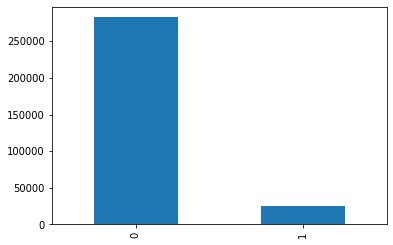

In [53]:
application_bureau['TARGET'].value_counts().plot(kind='bar')

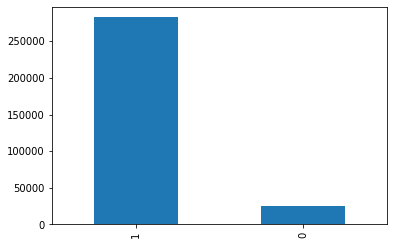

In [54]:
application_bureau_prev['TARGET'].value_counts().plot(kind='bar')

## Feature Selection

In [55]:
x = application_bureau.drop(['TARGET'], axis=1).abs()
y = application_bureau['TARGET'].abs()

In [56]:
# y = application_bureau_prev.pop('TARGET').values
# X_train, X_temp, y_train, y_temp = train_test_split(application_bureau_prev.drop(['SK_ID_CURR'],axis=1), y, stratify = y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
# print('Shape of X_train:',X_train.shape)
# print('Shape of X_val:',X_val.shape)
# print('Shape of X_test:',X_test.shape)

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [58]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
display(featureScores.sort_values(by=['Score'], ascending=False))

The features that correlate well with target feature:



,Features,Score
127,BUREAU_AMT_CREDIT_SUM,3.435545e+08
17,DAYS_EMPLOYED,1.954124e+08
9,AMT_GOODS_PRICE,1.223153e+08
7,AMT_CREDIT,7.669987e+07
125,BUREAU_AMT_CREDIT_MAX_OVERDUE,1.680393e+07
128,BUREAU_AMT_CREDIT_SUM_DEBT,7.666883e+06
130,BUREAU_AMT_CREDIT_SUM_OVERDUE,7.073143e+06
129,BUREAU_AMT_CREDIT_SUM_LIMIT,7.036507e+06
16,DAYS_BIRTH,2.235391e+06
6,AMT_INCOME_TOTAL,1.624102e+06


Dapat dilihat fitur mana yang berkorelasi baik dengan kesulitan pembayaran.

Fitur terbaik: DAYS_EMPLOYED, AMT_GOODS_PRICE, dan AMT_CREDIT

Fitur terburuk: FLAG_MOBIL, FLAG_CONT_MOBILE, dan AMT_REQ_CREDIT_BUREAU_HOUR

In [60]:
# define x and y features (top 20 features)
x_best = application_bureau_prev[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_best = application_bureau_prev['TARGET']

In [64]:
y = y_best
X_train, X_temp, y_train, y_temp = train_test_split(x_best, y, stratify = y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (215257, 20)
Shape of X_val: (46127, 20)
Shape of X_test: (46127, 20)


In [68]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)


RandomForestClassifier()


In [74]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17377
           1       1.00      1.00      1.00    197880

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257



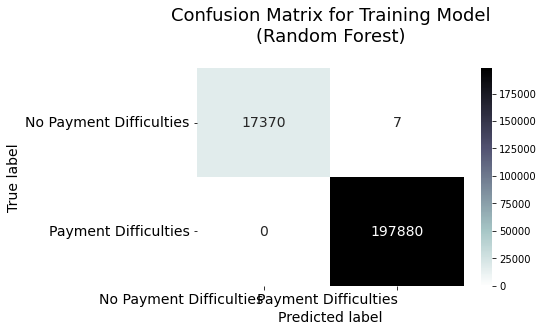

In [75]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()